# Used Car Price Prediction

This dataset contains 7,400 used car listings from India with 29 features, including car specifications, pricing details, ownership history, and availability.

## 1. Załadowanie danych i wstępna analiza

In [233]:
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
df = pd.read_csv(r'../data/Used_Car_Price_Prediction.csv')
df.sample(5)

,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,...,total_owners,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
101,maruti swift,2012,diesel,62476,317399,noida,693,hatchback,manual,vdi,...,1,334103,428945.0,great,2021-03-09T17:11:41.356,True,7372,47610,False,False
3781,toyota fortuner,2010,diesel,109598,1000000,mumbai,905,luxury suv,manual,3.0 mt 4x4,...,2,676000,NaN,good,2019-08-22T13:29:24.064,True,23228,150000,False,False
3712,honda city,2013,petrol,45750,520000,mumbai,153,sedan,automatic,v at,...,2,560612,645000.0,great,2020-11-16T13:22:28.734,True,12078,78000,False,False
4426,maruti eeco,2013,petrol & cng,148048,249799,pune,410,suv,manual,5 str with ac plushtr,...,2,230503,NaN,great,2021-03-25T05:37:15.119,True,5802,37470,True,False
3110,hyundai elite i20,2016,petrol,25868,589899,mumbai,107,hatchback,manual,sportz 1.2,...,1,498125,NaN,great,2021-04-09T07:24:16.947,True,13702,88485,False,False


In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7400 entries, 0 to 7399
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             7400 non-null   object 
 1   yr_mfr               7400 non-null   int64  
 2   fuel_type            7400 non-null   object 
 3   kms_run              7400 non-null   int64  
 4   sale_price           7400 non-null   int64  
 5   city                 7400 non-null   object 
 6   times_viewed         7400 non-null   int64  
 7   body_type            7297 non-null   object 
 8   transmission         6844 non-null   object 
 9   variant              7400 non-null   object 
 10  assured_buy          7400 non-null   bool   
 11  registered_city      7390 non-null   object 
 12  registered_state     7390 non-null   object 
 13  is_hot               7400 non-null   bool   
 14  rto                  7400 non-null   object 
 15  source               7274 non-null   o

In [ ]:
df.describe()

,yr_mfr,kms_run,sale_price,times_viewed,total_owners,broker_quote,original_price,emi_starts_from,booking_down_pymnt
count,7400.000000,7400.000000,7.400000e+03,7400.000000,7400.000000,7.400000e+03,4.120000e+03,7400.000000,7400.000000
mean,2013.885676,62624.520000,4.548892e+05,1550.706081,1.327297,4.322044e+05,5.510351e+05,10565.942027,68233.529054
std,3.087613,43532.042371,2.827023e+05,2080.952842,0.579798,2.880316e+05,3.119887e+05,6566.468434,42405.389468
min,1996.000000,60.000000,0.000000e+00,3.000000,1.000000,0.000000e+00,9.689900e+04,0.000000,0.000000
25%,2012.000000,31885.250000,2.811740e+05,554.750000,1.000000,2.526612e+05,3.414930e+05,6531.250000,42176.250000
50%,2014.000000,55765.000000,3.824490e+05,1088.000000,1.000000,3.611445e+05,4.674800e+05,8883.000000,57367.500000
75%,2016.000000,84184.000000,5.401490e+05,1926.500000,2.000000,5.260180e+05,6.675258e+05,12546.250000,81022.500000
max,2021.000000,996609.000000,3.866000e+06,61930.000000,6.000000,3.250000e+06,2.765057e+06,89798.000000,579901.000000


## 2. Czyszczenie danych

### 2.1 Sprawdzenie brakujących wartości

In [ ]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
df = df.dropna()

Missing values:  body_type               103
transmission            556
registered_city          10
registered_state         10
source                  126
car_availability        620
original_price         3280
car_rating                9
ad_created_on             1
fitness_certificate       8
dtype: int64


### 2.2 Sprawdzenie duplikatów

In [237]:
duplicate_values = df.duplicated().sum()
print("Duplicate values: ", duplicate_values)

Duplicate values:  0


## 3. EDA

### 3.1 Rozkład wartości liczbowych

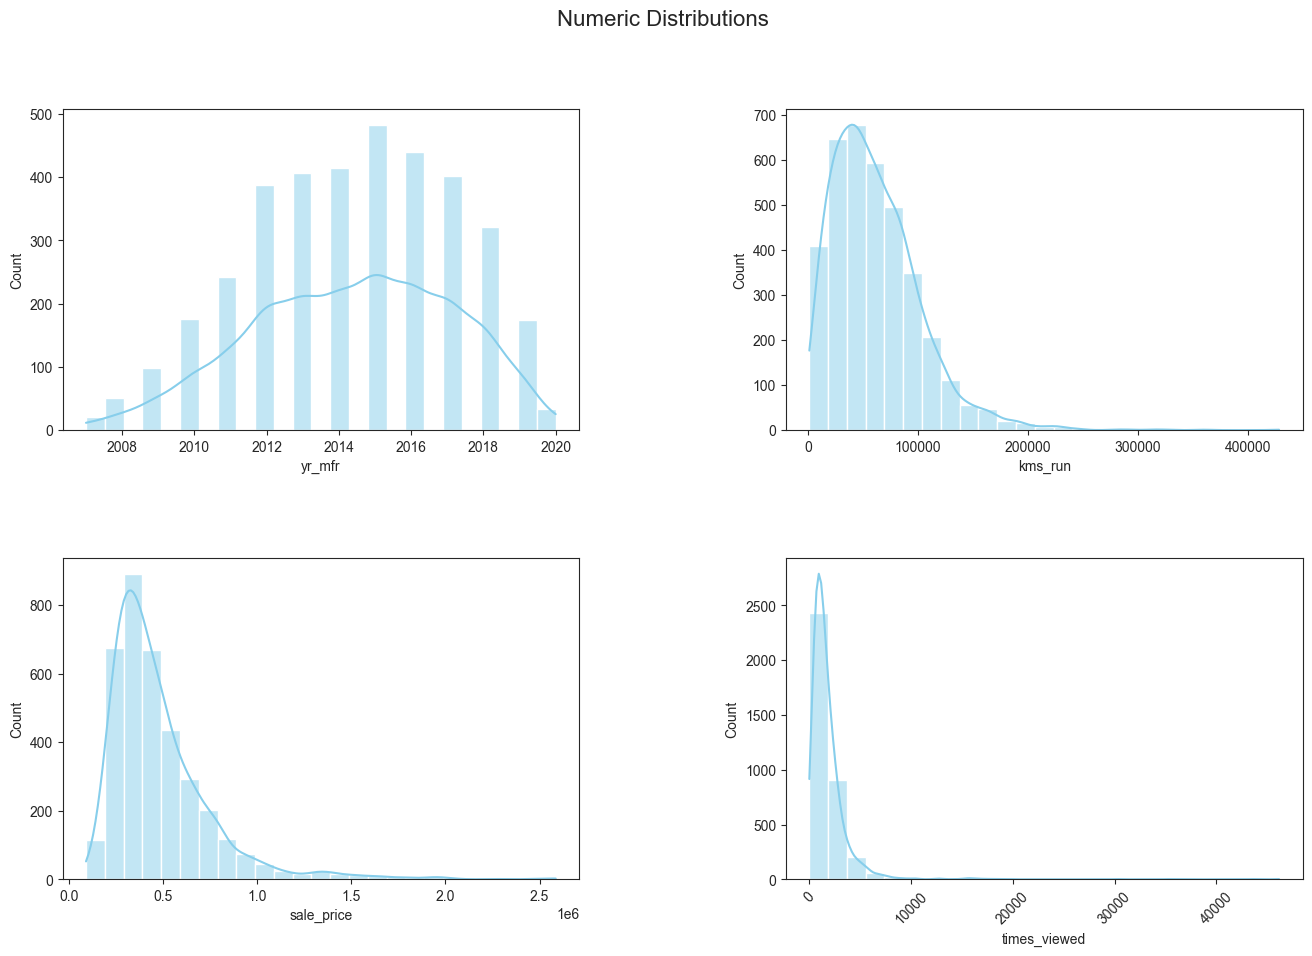

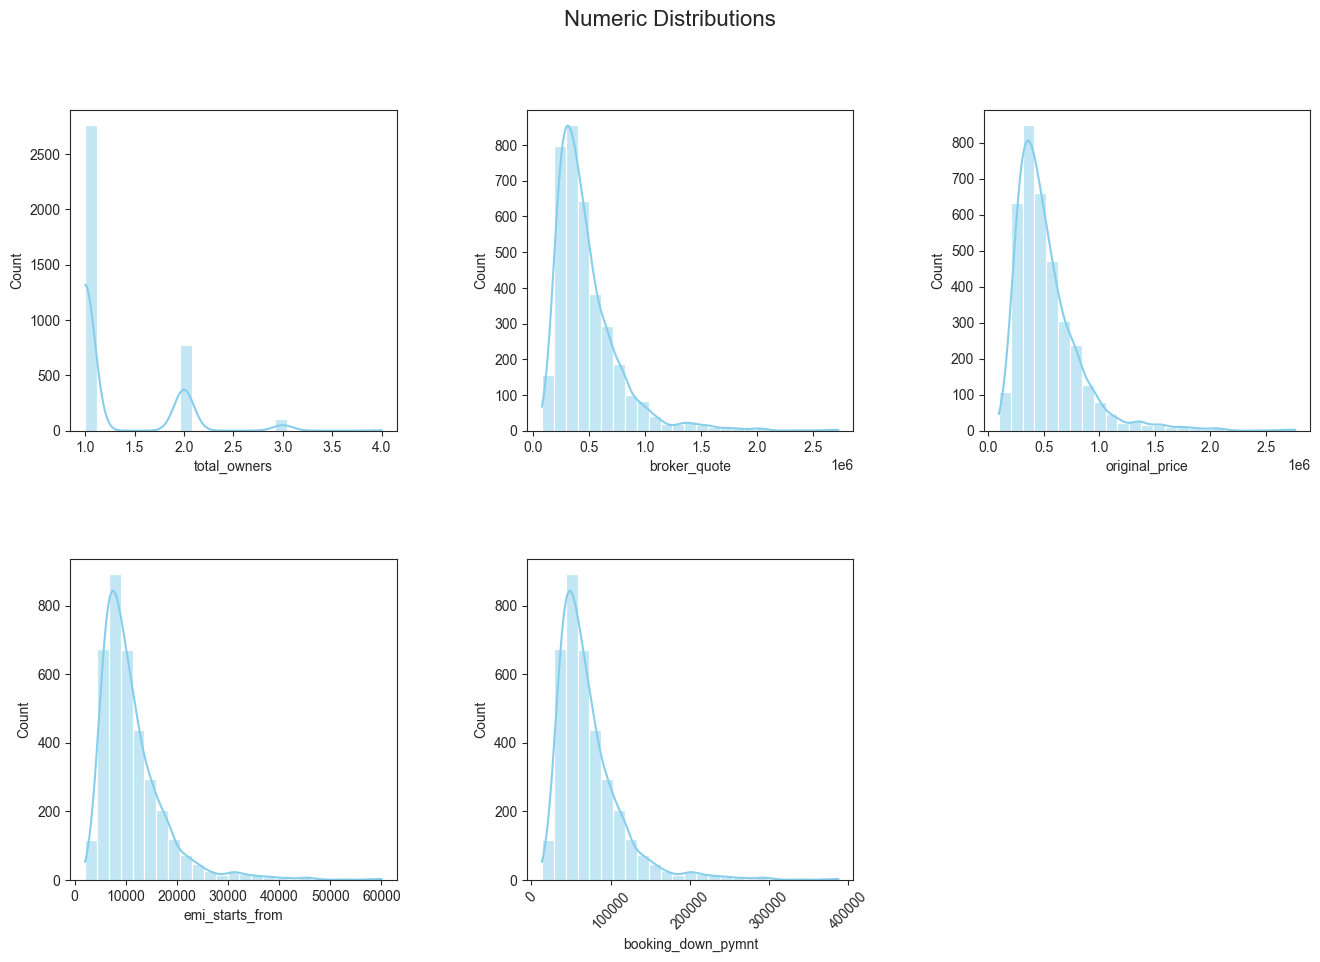

In [ ]:
numeric_list = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

def plot_numeric_distributions(df, cols, nrows, ncols, title):
    fig, axs = plt.subplots(nrows, ncols, figsize=(16, 10))
    axs = axs.flatten() 
    plt.subplots_adjust(hspace=0.4, wspace=0.4)
    
    for i, col in enumerate(cols):
        sns.histplot(df[col], bins=25, kde=True, ax=axs[i], color='skyblue', legend=False)
    
    for j in range(i+1, len(axs)):
        fig.delaxes(axs[j])
        axs[j].set_title(f"Distribution of {cols[j]}")
    
    fig.suptitle(title, fontsize=16)
    plt.xticks(rotation=45)
    plt.show()

plot_numeric_distributions(df, numeric_list, 3, 3, "Numeric Distributions")

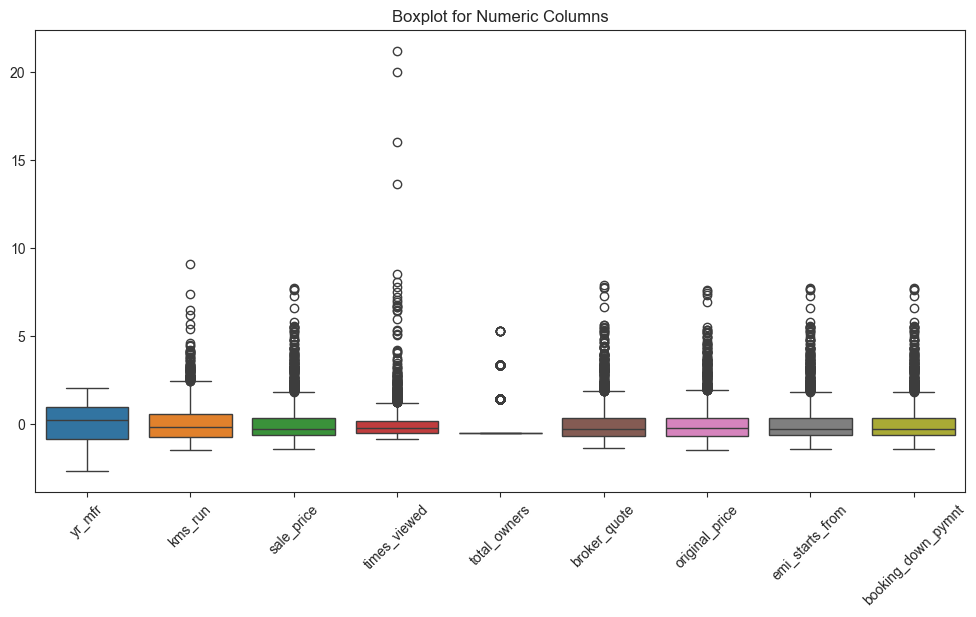

In [239]:
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df[numeric_list])

df_scaled = pd.DataFrame(scaled_values, columns=numeric_list)

plt.figure(figsize=(12,6))
sns.boxplot(data = df_scaled)
plt.xticks(rotation=45)
plt.title("Boxplot for Numeric Columns")
plt.show()

### 3.2 Rozkład wartości kategorycznych

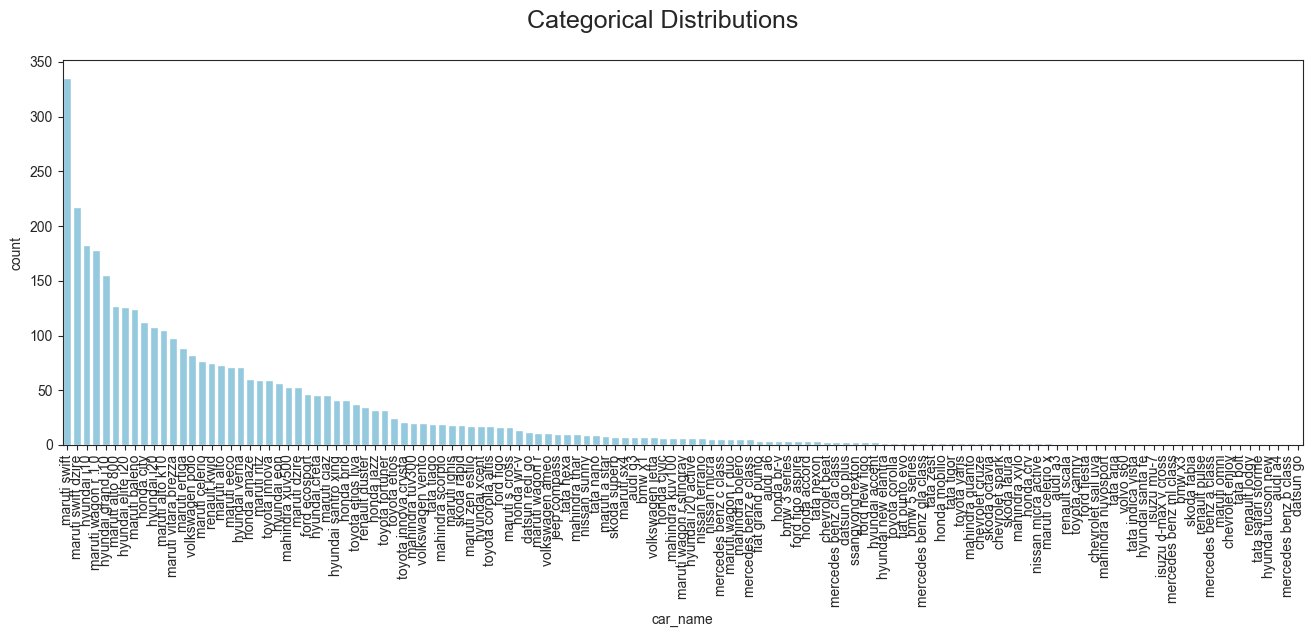

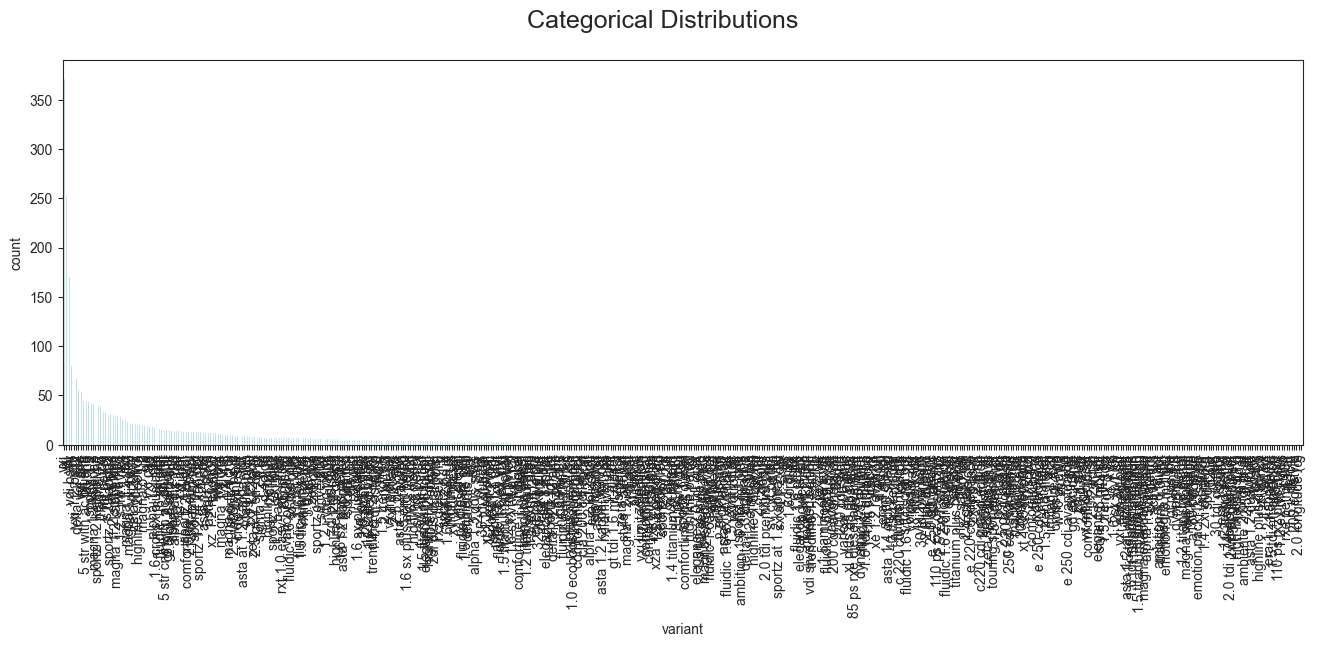

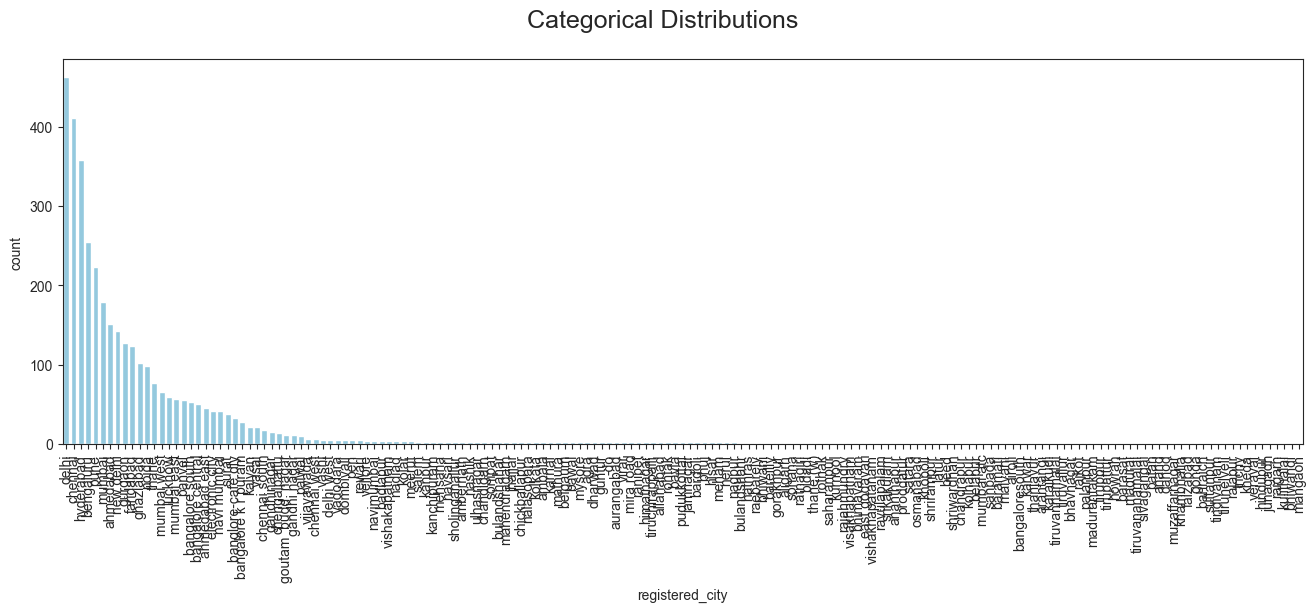

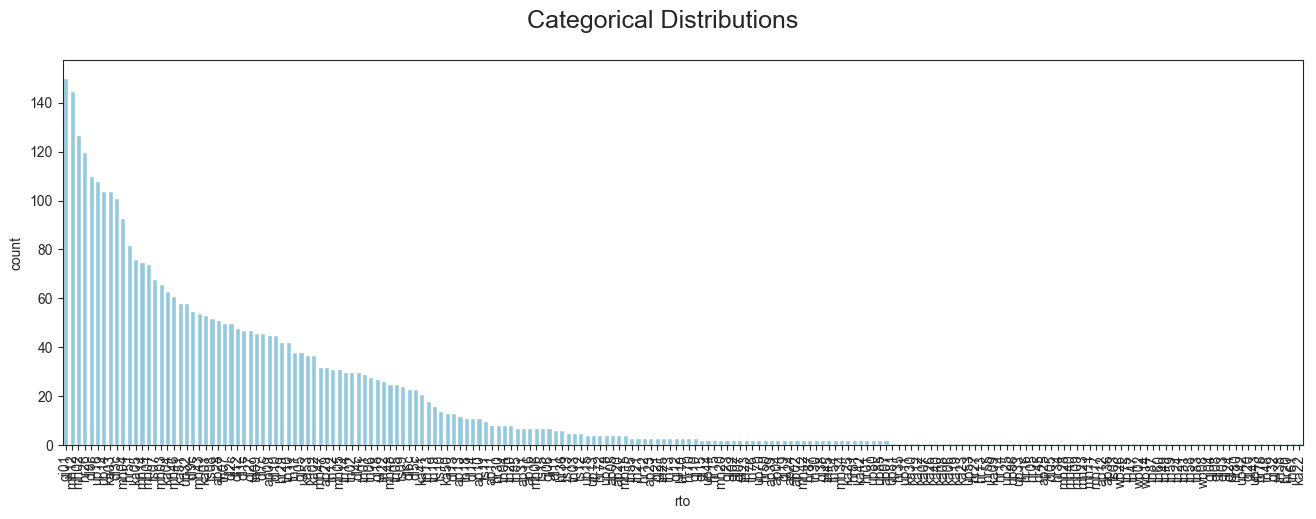

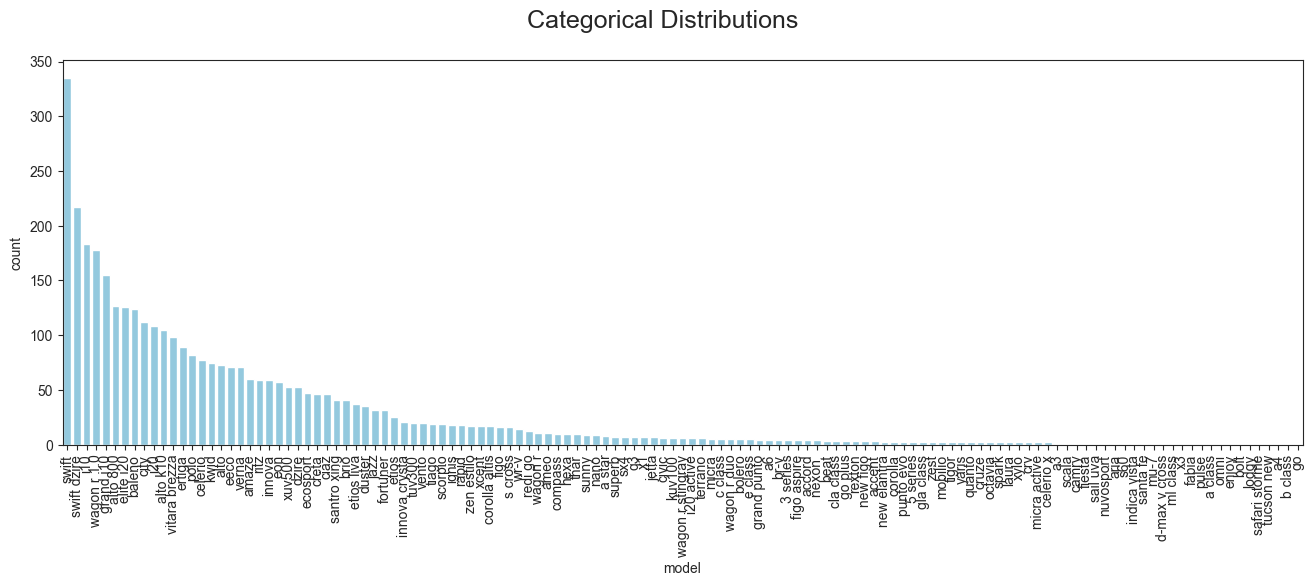

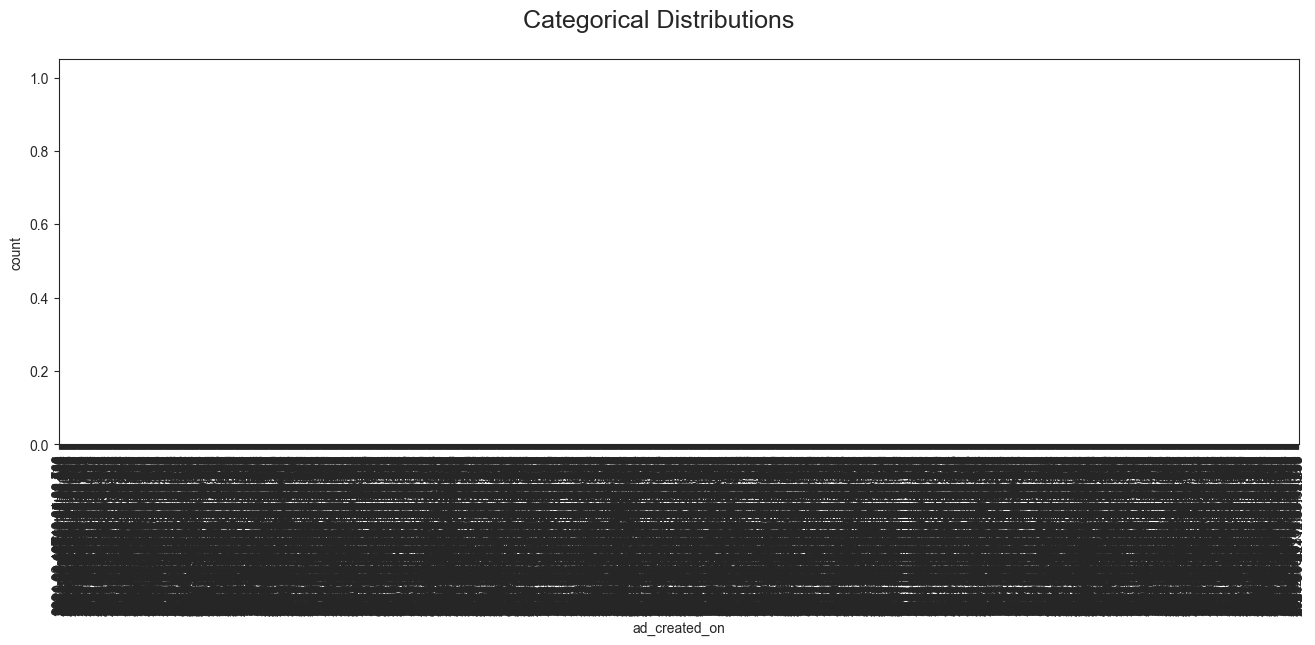

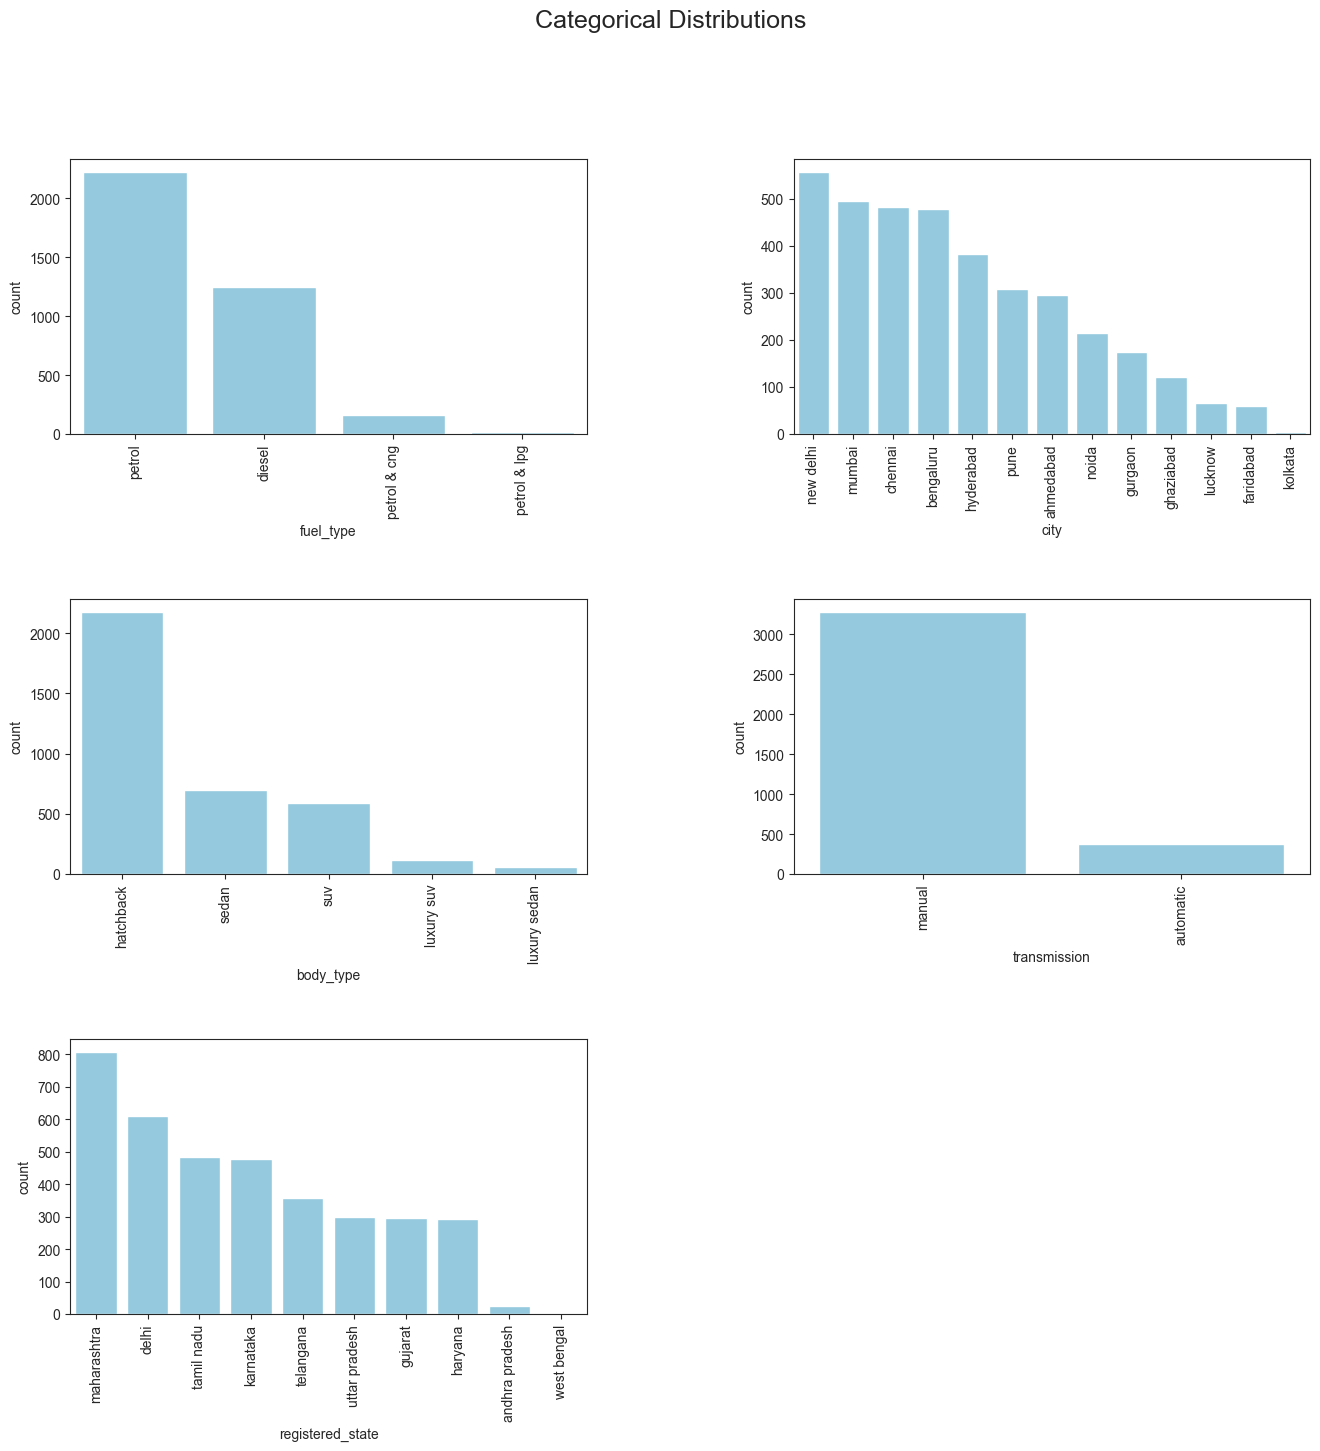

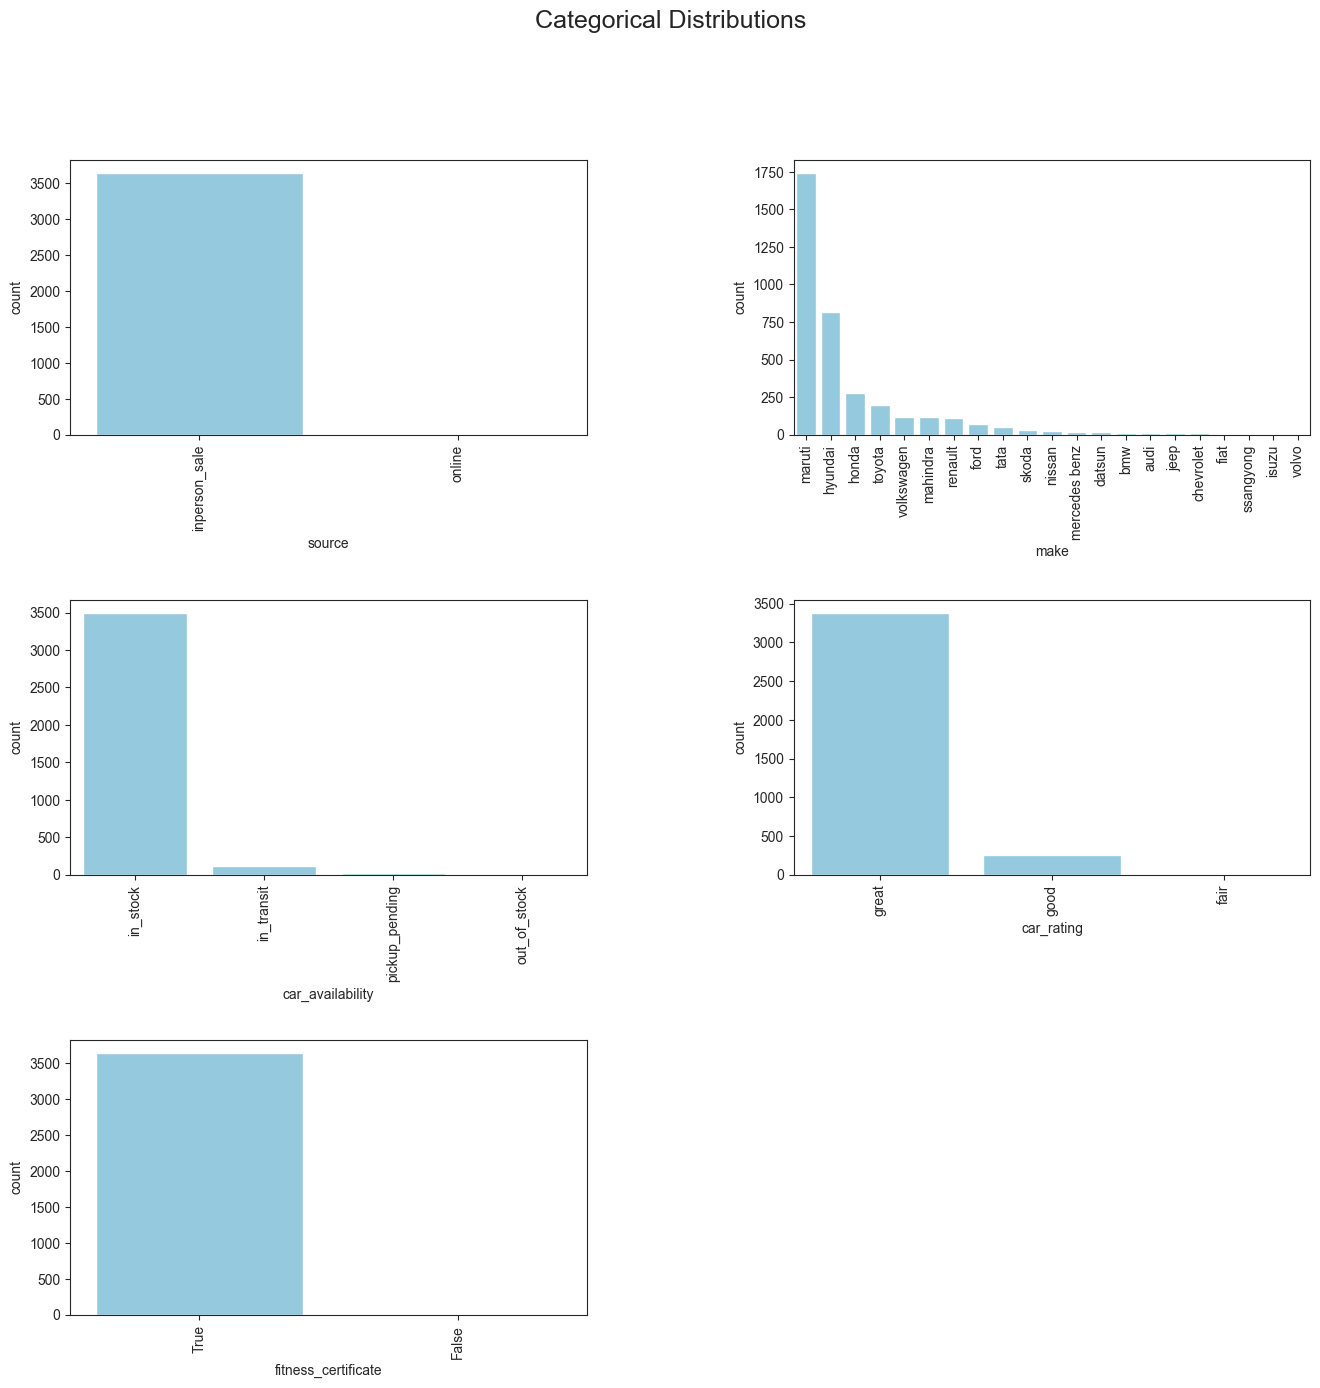

In [240]:
categorical_list = df.select_dtypes(include=["object"]).columns.tolist()

big_cols = ['car_name', 'variant', 'registered_city', 'rto', 'model', 'ad_created_on']
small_cols = [col for col in categorical_list if col not in big_cols]

def plot_categorical_distributions(df, cols, nrows, ncols, title="", color="skyblue"):
    fig, axs = plt.subplots(nrows, ncols, figsize=(16, nrows*5))
    
    if isinstance(axs, plt.Axes):
        axs = [axs]
    else:
        axs = axs.flatten()
    
    plt.subplots_adjust(hspace=0.6, wspace=0.4)
    
    for i, col in enumerate(cols):
        sns.countplot(
            x=col, 
            data=df, 
            ax=axs[i], 
            color=color, 
            order=df[col].value_counts().index
        )
        axs[i].tick_params(axis='x', rotation=90)
    
    for j in range(i+1, len(axs)):
        fig.delaxes(axs[j])

    fig.suptitle(title, fontsize=18)
    plt.show()


for col in big_cols:
    plot_categorical_distributions(df, [col], nrows=1, ncols=1, title=f"Categorical Distributions")

split_small = [small_cols[i:i + 5] for i in range(0, len(small_cols), 5)]
for idx, group in enumerate(split_small, 1):
    nrows = (len(group) + 1) // 2 
    ncols = 2
    plot_categorical_distributions(df, group, nrows, ncols, f"Categorical Distributions")


### 3.3 Rozkład wartości logicznych

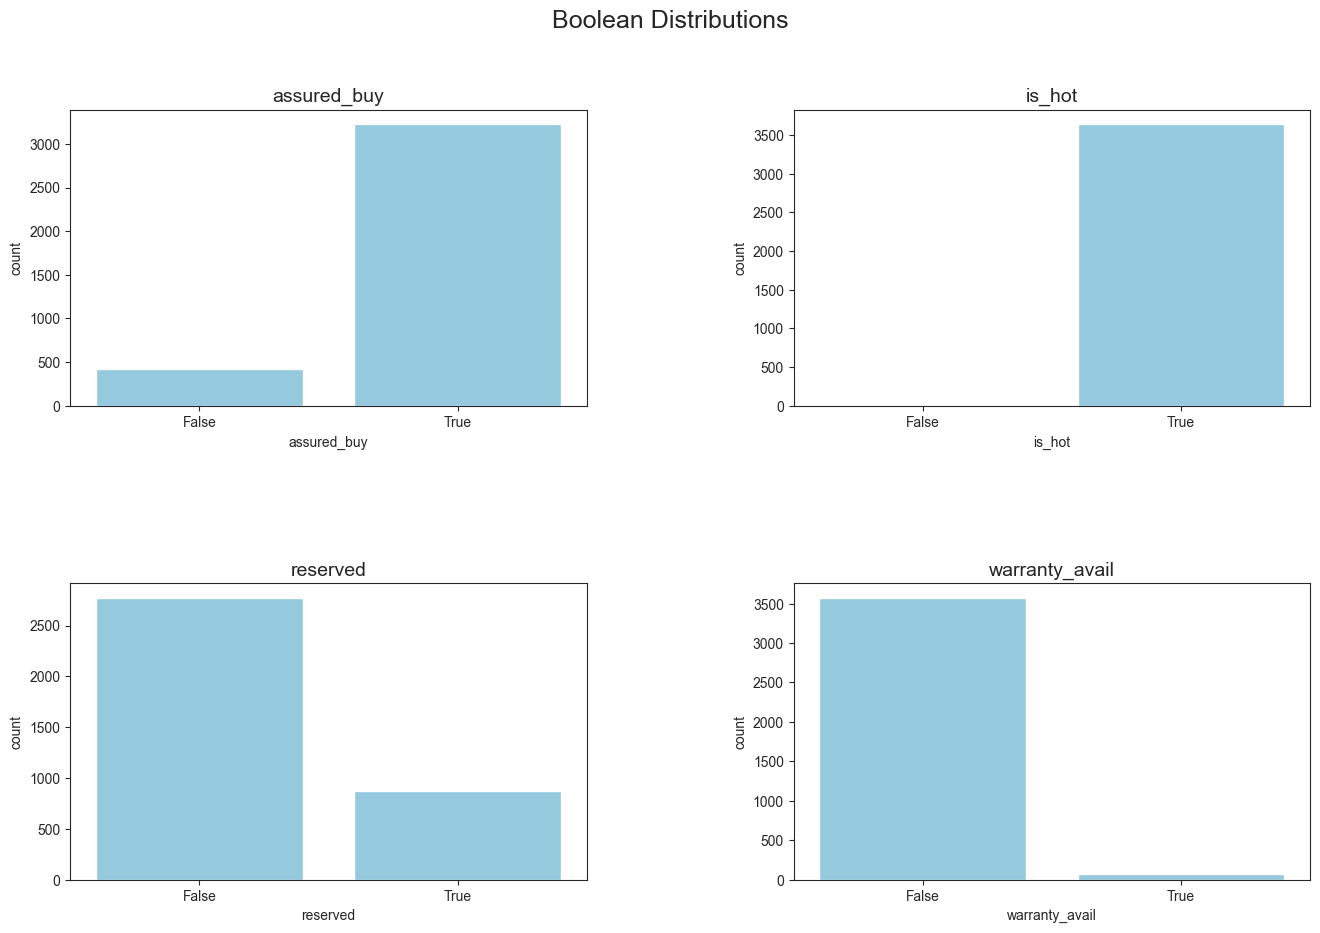

In [ ]:
bool_list = df.select_dtypes(include=["bool"]).columns.tolist()

def plot_bool_distributions(df, cols, color="skyblue"):
    ncols = 2
    nrows = (len(cols) + 1) // 2 
    fig, axs = plt.subplots(nrows, ncols, figsize=(16, nrows*5))
    
    if isinstance(axs, plt.Axes):
        axs = [axs]
    else:
        axs = axs.flatten()
    
    plt.subplots_adjust(hspace=0.6, wspace=0.4)
    
    for i, col in enumerate(cols):
        sns.countplot(x=col, data=df, ax=axs[i], color=color)
        axs[i].tick_params(axis='x', rotation=0)
    
    for j in range(i+1, len(axs)):
        fig.delaxes(axs[j])
    
    fig.suptitle("Boolean Distributions", fontsize=18)
    plt.show()

plot_bool_distributions(df, bool_list)

## 4 Przygotowanie danych

### 4.1 Skalowanie liczb, kodowanie kategorii i wartości logicznych

In [242]:
df[numeric_list] = scaled_values

In [243]:
def replace_and_encode_categories(df, col, threshold=0.001):
    if col in big_cols:
        freq = df[col].value_counts(normalize=True)
        rare_categories = freq[freq < threshold].index
        df[col] = df[col].apply(lambda x: 'Other' if x in rare_categories else x)
    
    df[col], uniques = pd.factorize(df[col])
    df[col]
    
    return df

for col in categorical_list:
    df = replace_and_encode_categories(df, col, threshold=0.01)



In [244]:
def encode_bool_columns(df, col):
    df[col] = df[col].astype(int)
    return df

for col in bool_list:
    df = encode_bool_columns(df, col)

### 4.2 Macierz korelacji

Correlation Matrix
car_name ↔ model: 1.00
sale_price ↔ broker_quote: 1.00
sale_price ↔ original_price: 0.99
sale_price ↔ emi_starts_from: 1.00
sale_price ↔ booking_down_pymnt: 1.00
registered_city ↔ registered_state: 0.77
is_hot ↔ source: -1.00
broker_quote ↔ original_price: 0.98
broker_quote ↔ emi_starts_from: 1.00
broker_quote ↔ booking_down_pymnt: 1.00
original_price ↔ emi_starts_from: 0.99
original_price ↔ booking_down_pymnt: 0.99
emi_starts_from ↔ booking_down_pymnt: 1.00


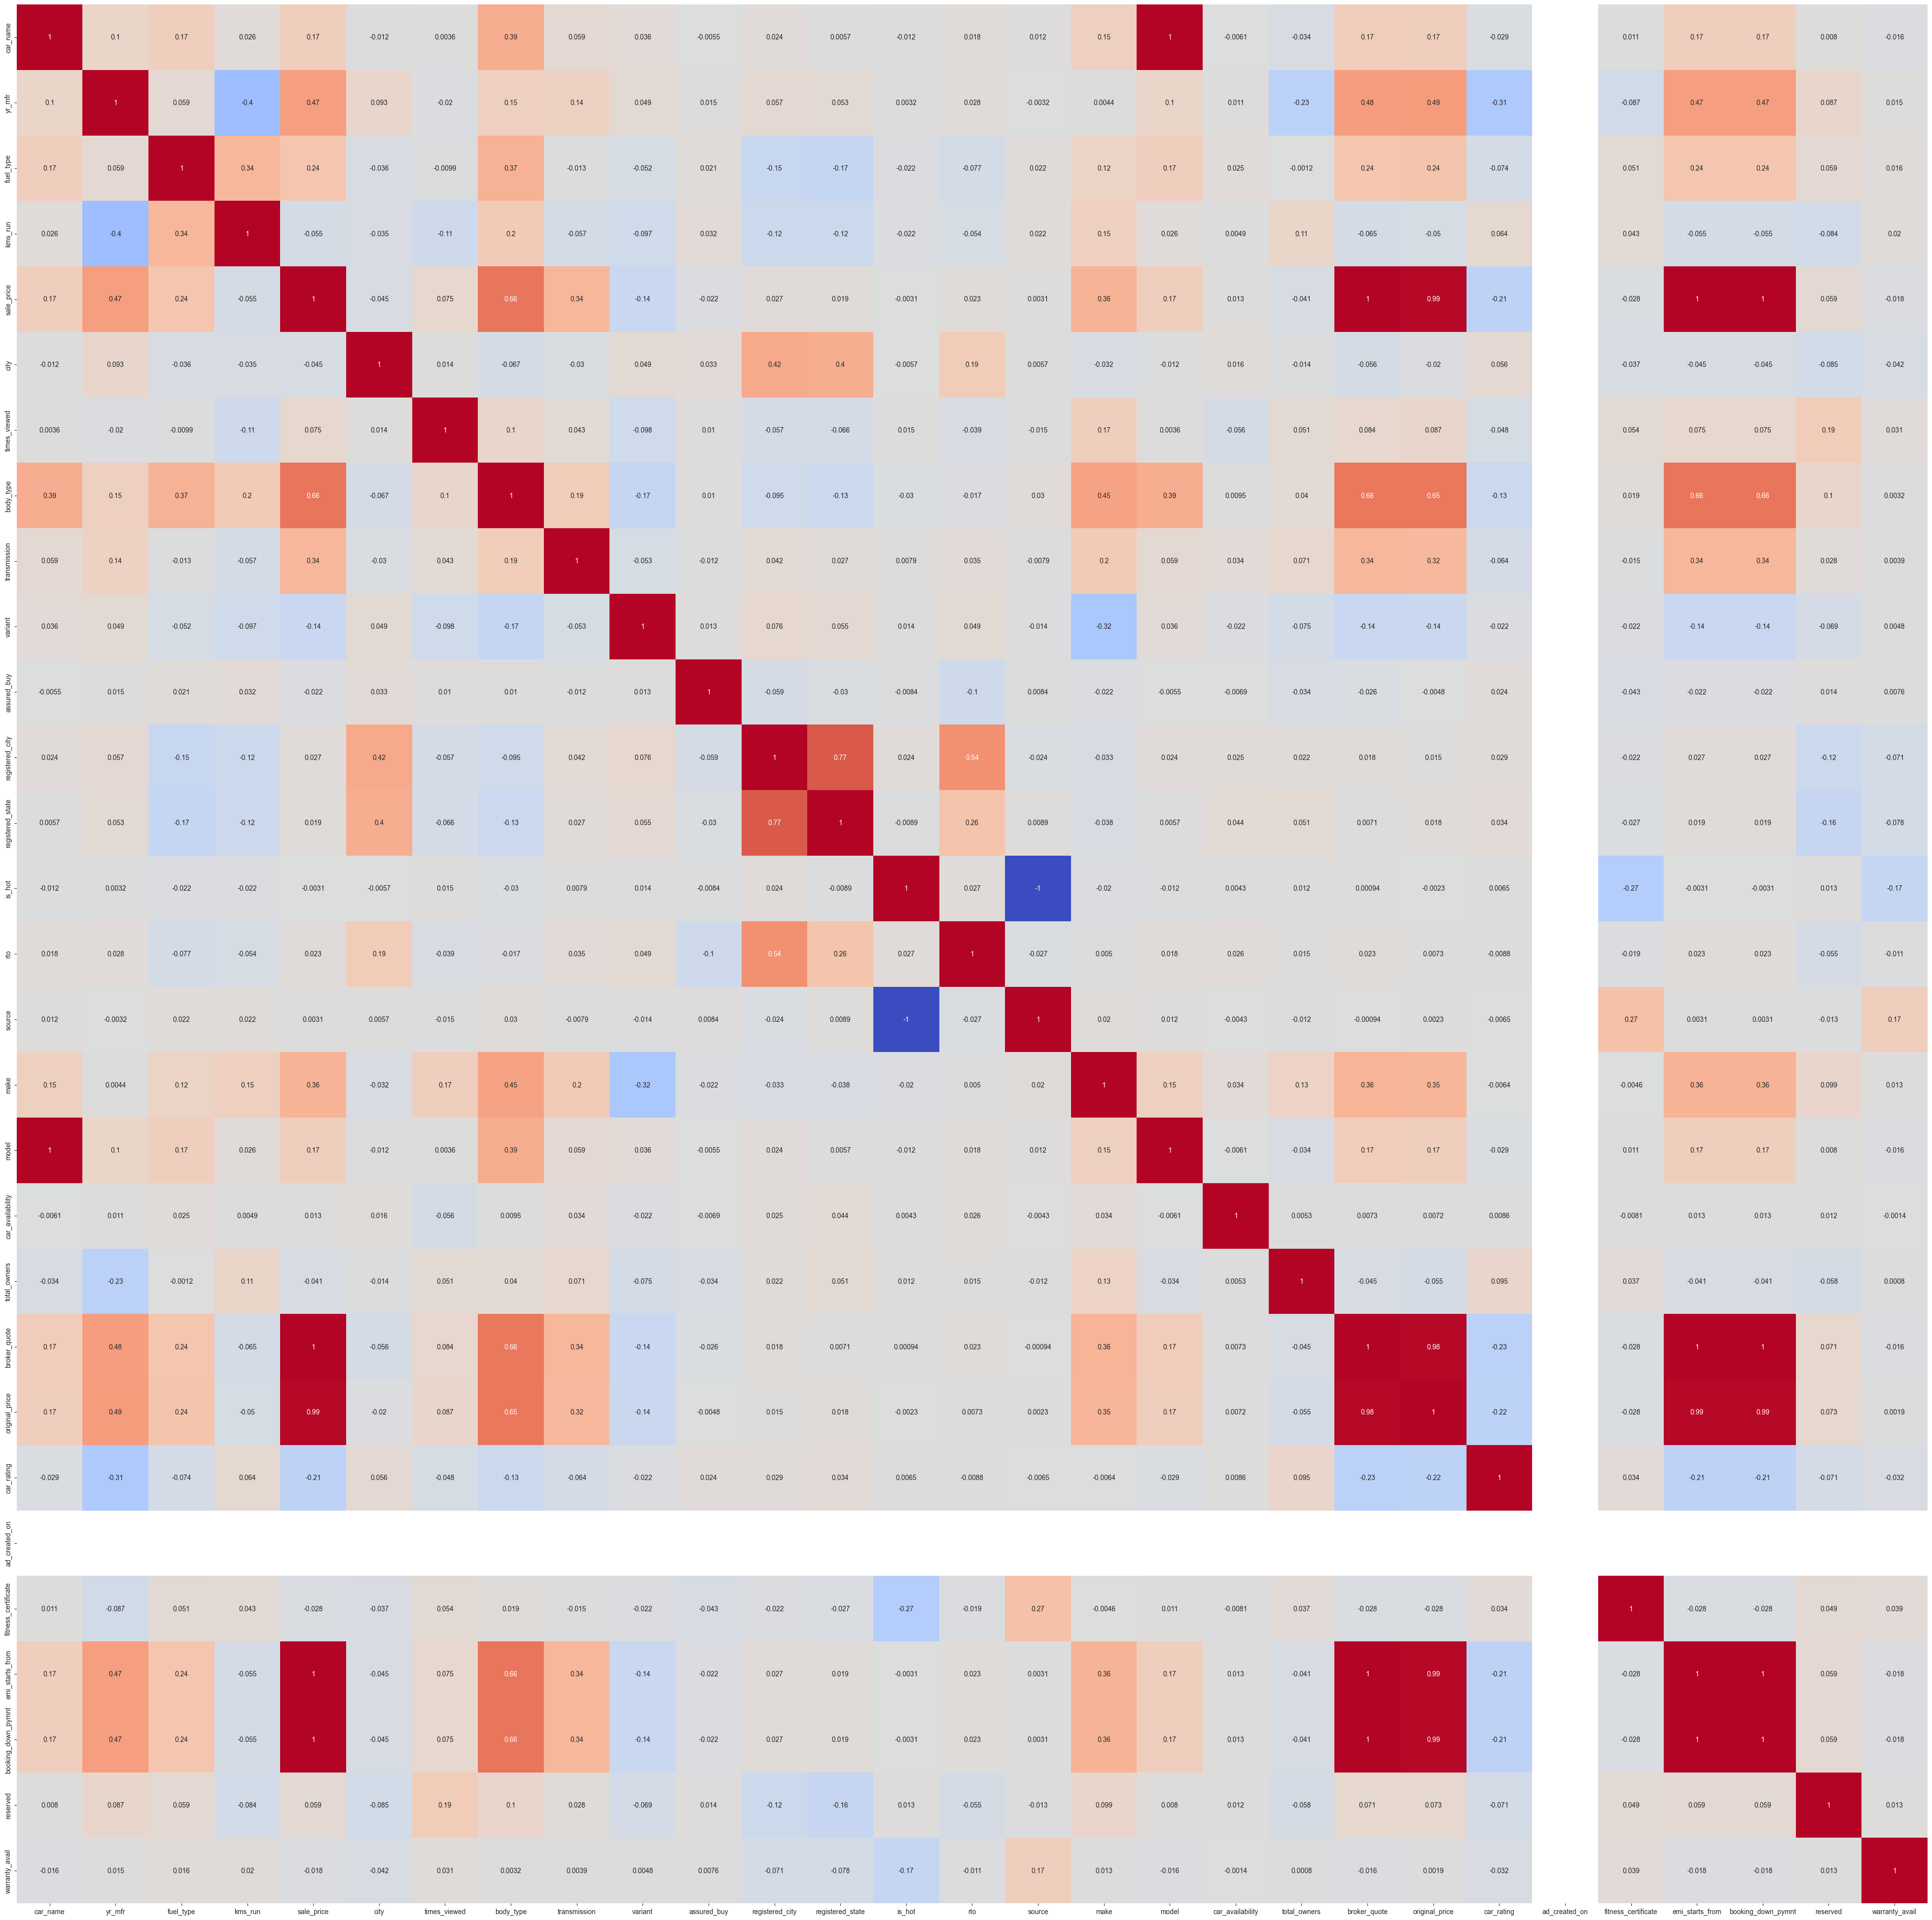

In [245]:
print("Correlation Matrix")
correlation_matrix = df.corr()
high_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            high_corr.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

for col1, col2, corr_value in high_corr:
    print(f"{col1} ↔ {col2}: {corr_value:.2f}")


X = df[df.columns[:-1]]
y = df[df.columns[-1]]

plt.figure(figsize=(50,50))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=False)
plt.show()

### 4.3 Usuwanie silnie skorelowanych kolumn

In [246]:
cols_to_drop = [
    "car_name", "broker_quote", "original_price", "emi_starts_from", 
    "ad_created_on", "booking_down_pymnt", "registered_state", 
    "rto", "is_hot"
]

df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])